<a href="https://colab.research.google.com/github/sa7890722/MACHINE-LEARNING-AND-NEURAL-NETWORKS/blob/master/EPIC_NUM_READER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
import matplotlib.pyplot as plt

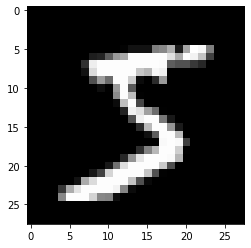

In [5]:
plt.imshow(X_train[0], cmap = 'gray')

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
#NORMALIZATION

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

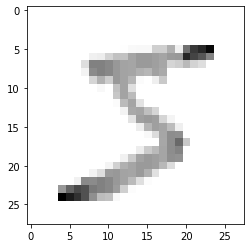

In [10]:
plt.imshow(X_train[0], cmap = 'binary')

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))

In [12]:
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1082 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0739 - accuracy: 0.9767


In [14]:
val_loss, val_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9665


In [15]:
prediction = model.predict(np.array((X_test)))

In [16]:
print(prediction)

[[8.34499971e-08 2.56165777e-09 6.56822476e-06 ... 9.99973893e-01
  4.47430288e-08 3.06441098e-06]
 [7.60039320e-09 7.81774997e-06 9.99956608e-01 ... 1.13387300e-08
  8.52237250e-08 4.81545663e-12]
 [3.64643675e-08 9.98985708e-01 4.03796839e-05 ... 4.89771715e-04
  2.87300267e-04 3.23759946e-06]
 ...
 [1.09013101e-07 8.47383149e-07 1.17185756e-07 ... 1.25670136e-04
  2.75091793e-06 1.98132340e-02]
 [3.97266103e-06 4.57903099e-07 7.53099982e-07 ... 1.11733452e-05
  1.29769603e-02 7.74301554e-07]
 [5.20547360e-07 2.98136165e-08 2.43141676e-06 ... 2.01232031e-09
  2.65331835e-07 1.53082112e-07]]


In [17]:
print(np.argmax(prediction[0]))

7


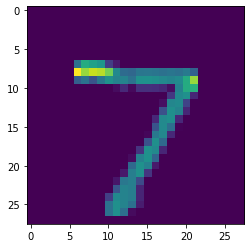

In [18]:
plt.imshow(X_test[0])